## Analysis of data
The data set provided contains 2000 positive IMDB review & the 2000 negative IMDB reviews. Each .txt file is labelled with an index and the number rating given.

Going through the reviews briefly here are the things that I identified:
1) The reviews seem to vary in length and there isn't a maximum amount of characters enforced

2) Some reviews contains <br /><br /> within their text

3) Some movie's (based on id) have negative and positive reviews like id=15

4) Several reviewers written sentimental opinions has many instances of sarcasm

5) All the reviews are in English

6) There seem to be no spelling errors

7) Words like "Gen-X/Y-ers" where it is cobbled up by the reviewer are used

8) Some but not all put the rating within the review (e.g: 4/10 or 4 of 10)

9) Grammar of sentences seem correct

## Analysis of task

Sentiment analysis essentially revolves around identifying and extracting subjective information from text. Determining the overall sentiment of a document or piece of text. Sentiment analysis is often used to classify the sentiment of types of user-generated content, to understand the public opinion about a particular topic or product. This can aid businesses to have better data analysis and allow them to make better informed decisions.

Sentiment analysis as a machine learning problem contains several chanllenges. One of these challenges pertains the subjectivty of language. Sentiment is often expressed in subtle ways, people often use irony, sarcasm, and other forms of figurative speech which isn't easy for machine to identify/understand.

First thoughts of machine learning may have issues with:
1) Sarcasm and irony are used within negative reviews when reviewers vent their frustration.

2) Phrases such as good "bad" (15_1.txt) are used which may affect word associations to sentiments.

3) Words may be misinterpreted like "sad", the movie could be a sad story but is a good film and have a positive review which may be classified wrongly if using word associations to sentiment. While for a negative review (413_3.txt) "Just sad." is written to display their dissapointment within a negative sentiment. The contradictions is shown.

4) Reviews vary in length which may effect the term frequencies.

These issues are strongly correlated with the feature vectors we choose (e.g, length, term frequency, word associtaion,...). More detail will be discussed pertaining the different feature vectors chosen and the specific issues that come with it.

## Reading .txt files and processing them into list

In [1]:
def read_documents(string):
    f = open(string) # if accessed locally
    merged = ""
    text=f.read()
    text=text.replace("<br />", "")
    text=text.strip()
    f.close()
    return text

In [2]:
import os
all_data=[]
file_names=[]
senti=["pos","neg"]
current_directory = os.getcwd()
for sen in senti:
    #change path to txt files if required here
    path = "/Users/simonlim/Library/CloudStorage/OneDrive-UniversityofBath/NLP/Assignment/data/"+sen
    os.chdir(path)
    for count,file in enumerate(os.listdir()):
            file_path = path+"/"+file
          # Pre-processing  file_names.append(file)
            
            if sen == "pos":
                all_data.append((read_documents(file_path),"positive"))
            else:
                all_data.append((read_documents(file_path),"negative"))

print("Number of reviews: {}".format(len(all_data)))

Number of reviews: 4000


# Pre-processing

Preparing raw text data for further analysis through cleaning and normalizing text, tokenizing the text into individual words or phrases, removing punctuation and stop words, and stemming or lemmatizing the words to reduce them to their base form can help improve the performance and accuracy of our sentiment analysis . Pre-processing can remove noise and inconsistencies that can interfere with the analysis, and by tokenizing and lemmatizing the words, it can possibly make it easier for the model to identify and analyze the individual components of the text.

In [3]:
import nltk
import string

#removed the stopwords, lemmatize and stematized words as well the text of a document 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from sklearn.model_selection import train_test_split
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
lm = WordNetLemmatizer()
st= LancasterStemmer()
stoplist = set(stopwords.words('english'))




/Users/simonlim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonlim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simonlim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simonlim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/simonlim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:

##For Naive Bayes
def get_features_label(text,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt):
    features = {}
    terms = {}
    if doNothing:
        words=text.split(" ")
    elif doLemma:
        words=get_features_lemma(text,doTokenize,doStopWords,doPuncFilt)
    elif doStemma:
        words=get_features_stemma(text,doTokenize,doStopWords,doPuncFilt)
    elif doTokenize:
        tokenized=word_tokenize(text)
        lowered = [w.lower() for w in tokenized]
        if doStopWords:
            if doPuncFilt:
                words = [word for word in lowered if word not in stoplist and word.isalpha()]
            else:
                words = [word for word in lowered if word not in stoplist]
        else:
            if doPuncFilt:
                words = [word  for word in lowered if  word.isalpha()]
            else:
                words = [word  for word in lowered]
    elif doTokenize==False:
        split = text.split(" ")
        lowered = [w.lower() for w in split]
        if doStopWords:
            if doPuncFilt:
                words = [word for word in lowered if word not in stoplist and word.isalpha()]
            else:
                words = [word for word in lowered if word not in stoplist]
        else:
            if doPuncFilt:
                words = [word for word in lowered if word.isalpha()]
            else:
                words = [word for word in lowered]
                
    for word in words:
        features[word] = True
    return features


def get_features_stemma(text,doTokenize,doStopWords,doPuncFilt): 
    if doTokenize:
        tokenized=word_tokenize(text)
        lowered = [w.lower() for w in tokenized]
        if doStopWords:
            if doPuncFilt:
                word_list = [st.stem(word) for word in lowered if word not in stoplist and word.isalpha()]
            else:
                word_list = [st.stem(word) for word in lowered if word not in stoplist]
        else:
            if doPuncFilt:
                word_list = [st.stem(word) for word in lowered if word.isalpha()]
            else:
                word_list = [st.stem(word) for word in lowered]
                
    elif doTokenize==False:
        split = text.split(" ")
        lowered = [w.lower() for w in split]
        if doStopWords:
            if doPuncFilt:
                word_list = [st.stem(word) for word in lowered if word not in stoplist and word.isalpha()]
            else:
                word_list = [st.stem(word) for word in lowered if word not in stoplist]
        else:
            if doPuncFilt:
                word_list = [st.stem(word) for word in lowered if word.isalpha()]
            else:
                word_list = [st.stem(word) for word in lowered]
    sentences=word_list
    return sentences

def get_features_lemma(text,doTokenize,doStopWords,doPuncFilt): 
    if doTokenize:
        tokenized=word_tokenize(text)
        lowered = [w.lower() for w in tokenized]
        if doStopWords:
            if doPuncFilt:
                word_list = [lm.lemmatize(word) for word in lowered if word not in stoplist and word.isalpha()]
            else:
                word_list = [lm.lemmatize(word) for word in lowered if word not in stoplist]
        else:
            if doPuncFilt:
                word_list = [lm.lemmatize(word) for word in lowered if word.isalpha()]
            else:
                word_list = [lm.lemmatize(word) for word in lowered ]
                
    elif doTokenize==False:
        split = text.split(" ")
        lowered = [w.lower() for w in split]
        if doStopWords:
            if doPuncFilt:
                word_list = [lm.lemmatize(word) for word in lowered if word not in stoplist and word.isalpha()]
            else:
                word_list = [lm.lemmatize(word) for word in lowered if word not in stoplist]
        else:
            if doPuncFilt:
                word_list = [lm.lemmatize(word) for word in lowered if word.isalpha()]
            else:
                word_list = [lm.lemmatize(word) for word in lowered]
    sentences=word_list
    return sentences


def posTAGGING(text):
    doc=nlp(text)
    word_list=[]
    for token in doc:
        if token.pos_=="ADJ" or token.pos=="ADV":
            word_list.append(token.text)
    sentences=" ".join(word_list)
    return sentences

## Feature Selection

When considering the task intuitively the ideas that come into mind are to use words and length of review to analyse sentiment.

However with lengh as a feature it doesn't work. With a Naive Bayes model it only got a 51% accuracy. Hence I decided with my current base model.

With the baseline model I decided upon using individual words as the feature to look at. First by pre-processing and compiling all the words found in the positive and negative documents and labelling the them with their sentiment. How the labelled data are used will be explained later.

### Generate traning/test splits

To take into account of generalization I decided to create 4 training/test splits with different random_states.

In [5]:
labels = ["positive"] * 2000 + ["negative"] * 2000
X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=23)
X_train2, X_test2, y_train2, y_test2 = train_test_split(all_data, labels, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(all_data, labels, test_size=0.2, random_state=10)
X_train4, X_test4, y_train4, y_test4 = train_test_split(all_data, labels, test_size=0.2, random_state=24)
X_train5, X_test5, y_train5, y_test5 = train_test_split(all_data, labels, test_size=0.2, random_state=7)

In [6]:
#tuple with 1st element as the featured words
#2nd element is the sentiment
train_list=[]
test_list=[]
def set_methods(doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt):
    train_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_train]
    test_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_test]
    train2_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_train2]
    test2_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_test2]
    train3_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_train3]
    test3_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_test3]
    train4_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_train4]
    test4_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_test4]
    train5_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_train5]
    test5_features = [(get_features_label(sents,doNothing,doStemma,doLemma,doTokenize,doStopWords,doPuncFilt), label) for (sents, label) in X_test5]
    train_list.append(train_features)
    train_list.append(train2_features)
    train_list.append(train3_features)
    train_list.append(train4_features)
    train_list.append(train5_features)
    test_list.append(test_features)
    test_list.append(test2_features)
    test_list.append(test3_features)
    test_list.append(test4_features)
    test_list.append(test5_features)
#doNothing,           ,stem,lemm, token,stop,alpha
set_methods(False    ,False,True,True,True,False)
# print(f"Element at index [0] of training set features: {train_list[0]}")

### Sanity check

Sanity check ensures that our train/test split has around equal split of negative and positive reviews.

In [7]:
def catProportions(data, cat):
    count = 0
    for item in data:
        if item[1]==cat:
            count += 1
    return float(count) / float(len(data))
print(catProportions(X_train,"positive"))
print(catProportions(X_test,"negative"))
print(catProportions(X_train2,"positive"))
print(catProportions(X_test2,"negative"))
print(catProportions(X_train3,"positive"))
print(catProportions(X_test3,"negative"))
print(catProportions(X_train4,"positive"))
print(catProportions(X_test4,"negative"))

0.5
0.5
0.493125
0.4725
0.495
0.48
0.5015625
0.50625


## Base implementation using Naive Bayes

For the this implementation we will be using the NLTK's Naive Bayes classifier. Naive Bayes algorithm is based on the assumption that each feature is independent of one another, thus allowing predictions using only the probabilities of each individual feature. This is works with our task if we were to perform word association as the aglorthm assumes that each word is indepdent of each other thus it allows for predictions based on the probabilties of each word independently. This assumption leads to a more simple and efficient algorithm. More specifically the type of Naive Bayes used is a Multimodal Naive Bayes classifier. The difference between multimodel and other models it that they can incorporate different sources of data. A multimodal classifier can use data from multiple modalities while other types of naive Bayes classifiers can only use data from a single modality.


Above is a figure describing how the probability is calculated:
Consider the word amazing, to find the probability that amazing is in a positive review (amazing| Positive), we would need the determine the probablity of a positive review containing the word amazing(positive|amazing)  divided by the probability of a review being positive.
This can also be seen as:
P(amazing)|Positive) = (count of amazing in our data set) / (number of positive review)

Now we perform that on every word we find and get their probabilities. We then multiply the probabilities of each word occurring in each class, and then compare the resulting probabilities to determine the class with the highest probability.

Now that we have our pre-processing tools,selected feature vector and understaning of the classification algortihm we can now perform our sentiment analysis.

In [8]:
from nltk import NaiveBayesClassifier, classify

print (f"Training set size = {str(len(X_train))} reviews")
print (f"Testin set size = {str(len(X_test))} reviews")
# train the classifier
count=0
count2=0
for i in range (5):
    classifier = NaiveBayesClassifier.train(train_list[i])
    training_accuracy=classify.accuracy(classifier, train_list[i])*100
    count+=training_accuracy
    testing_accuracy=classify.accuracy(classifier, test_list[i])*100
    count2+=testing_accuracy
    print (f"Accuracy on the training set {i} = {training_accuracy}%")   
    print (f"Accuracy on the testing set {i} = {testing_accuracy}%")

##to identify generalability
print(f"Average accuracy: {count/5}")
print(f"Average accuracy: {count2/5}")
# check which words are most informative for the classifier
print("Most informative features within training and test set 5:")
classifier.show_most_informative_features(20)

Training set size = 3200 reviews
Testin set size = 800 reviews
Accuracy on the training set 0 = 98.59375%
Accuracy on the testing set 0 = 81.0%
Accuracy on the training set 1 = 98.71875%
Accuracy on the testing set 1 = 82.625%
Accuracy on the training set 2 = 98.625%
Accuracy on the testing set 2 = 83.375%
Accuracy on the training set 3 = 98.5625%
Accuracy on the testing set 3 = 82.5%
Accuracy on the training set 4 = 98.4375%
Accuracy on the testing set 4 = 81.0%
Average accuracy: 98.5875
Average accuracy: 82.1
Most informative features within training and test set 5:
Most Informative Features
               laughable = True           negati : positi =     18.5 : 1.0
                    7/10 = True           positi : negati =     15.1 : 1.0
                   waste = True           negati : positi =     13.6 : 1.0
                fabulous = True           positi : negati =     12.4 : 1.0
              incoherent = True           negati : positi =     12.3 : 1.0
            unbelievably

[[334  63]
 [ 89 314]]


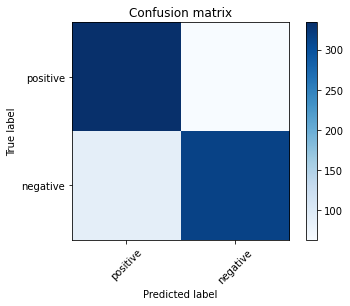

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
# predicted labels
y_pred = classifier.classify_many([fs for (fs, l) in test_list[4]])

# actual labels
y_true = [label for (sentence, label) in test_list[4]]

# generate confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

# display confusion matrix
plt.imshow(confusion_matrix, cmap='Blues')

# add colorbar
plt.colorbar()

# add labels
labels=["positive","negative"]
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# add title and axis labels
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show plot
plt.show()

| Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Training Accuracy |Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: | :-: | :-:|
|False | False | False| False| False | 99.44%  |80.75%|
|False | False | True | False | False | 97.88% |81.3%|
|False | False | False| True | True  | 98.12% |80.95%|
|False | False | True | True | True  | 98.22% |81.85% |
|False | False | True | True | False | 98.74% |82.15%|
|False | True  | True | True | False | 98.44% |82.1%|
|False | True  | True | False | False  |97.61% |81.25%|
|False | True  | False | False | False  |99.27% |81.5%|
|False | True  | True | True | True  |97.88% |82.45%|
|True | False  | True | True | True  |96.34% |82.05%|
|True | False  | True | False | False  |96.67% |80.8%|
|True | False  | True | True | False  |97.51% |82.25%|
|True | False  | False | False | False  |99.10% |81.4%|
|True | False  | True | False | True  |95.50% |81.75%|

### Accuracy

By adjusting the different pre-processing steps our accuracies change. Looking at the table you can see the different combinations of pre-processing steps and the corresponding average accuracies over 5 training/test splits. The highest accuracy obtained in 82.45%.
#### No pre-processing
Without any pre-processing at all and splitting the words through whitespaces we obtained an average score of 80.75%. 
#### Tokenization
With only the use of tokenization we gained an increase to 81.3%. Tokenization can improve the accuracy as it may remove punctuations. For example by removing punctuations, you can prevent a review with a lot of exclamation points from being wrongly classified as highly negative or positive.

#### Stopwords
Stop words do not contain any useful information that the model can use to make predictions. By removing stop words, you can reduce the amount of noise in the text, which can help the model make more accurate predictions. This is shown when the probability increases to 81.3%.

#### Focussing only on strings containing alphabets
You can see that when we only filter alphabets the number of accuracy decreases. This is because within reviews, there are sometimes ratings "7/10" that are written which many of the 7 rating reviews have and is one of the top 20 most informative features for being positive.

#### Stemmatise
Stemmatization is the process of reducing words to their base forms. For exaple words like "good", "better", and "best", reduce to "good". This reduces the amount of noise within our feature set which can increase accuracy as seen below.
#### Lemmatise
Consider the same example as above "good", "better", and "best", lemmatization reduces these to "good" when used in comparision, but unlike stemmatization it would reduce "best" to the lemma "well" when used as an adverb. This would allow us to treat these words as if they were the same word, while still holds it own nuance. This performed better than Stemmatisation. Lemmatization coupled with teoknization and removal of stopwards had the greater increase in testing accuracy.


### Confusion Matrix
What has been understood from the matrix is that 97 negative reviews were tagged positive while 58 positive reviews were tagged negative. This would mean that there are certain words that are used alot in negative reviews that overlapped. This could be due to the point the idea of sarcasm and irony. Sarcasm and irony is scattered throughout negative reviews. This could also indicate how we use our language. This data could potentially mean that we tend to use more sarcasm and irony when we feel a negative way.


### Most informative features
When we don't filter out strings that contains strings not only with alphabets. Few things can be seen when analyzing the most informative features. The model seems to like the fraction numbers as identifiers. However it does not seem to be the case when I filter strings to only contains alphabets the prediction accuracy goes up. This mean that the model has less words to use and identifers but the reduce of noise causes the increase in accuracy. Many of the words seen were surprising to see as they typically aren't sentimental however our model picks up on these. There may be sentimental correlations to the words that I might not know of.

Now we will try using a TF-IDF instead with a Naive Bayes Classifier.
This time we will be using a sklearn's Multimodal Naive Bayes classifier as it allows tfidf values vectors to be passed in.
## TF-IDF
TF-IDF is a weighted model that represents the importance of a word in a document by its frequency within that document and its frequency across all documents.

The TfidfVectorizer converts the text into numerical representations (feature vectors). When you apply the TfidfVectorizer to an input review, it will first tokenize the review into individual words and then compute the term-frequency-inverse-document-frequency (TF-IDF) value for each word.

The term-frequency is a measure of how often an item appears in the review, while the inverse-document-frequency is a measure importance to of an item to particular document. The TF-IDF is calculated by the product of term-frequency and inverse-document-frequency, and it is used to weigh the importance of each token in the review.

The range of TF-IDF scores are from 0-1 with 1 being most important and 0 the least. 

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets
labels = ["positive"] * 2000 + ["negative"] * 2000
processed=[]
vectorizer = TfidfVectorizer()
for items in all_data:
    textF=get_features_lemma(items[0],True,True,True)
#     textF=get_features_stemma(items[0],True,True,True)
    textF=" ".join(textF)
    processed.append(textF)
X_train, X_test, y_train, y_test = train_test_split(processed, labels, test_size=0.2, random_state=23)#23
# X_train2, X_test2, y_train2, y_test2 = train_test_split(all_data, labels, test_size=0.2, random_state=42)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(all_data, labels, test_size=0.2, random_state=10)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(all_data, labels, test_size=0.2, random_state=24)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(all_data, labels, test_size=0.2, random_state=7)
X_train_vector1 = vectorizer.fit_transform(X_train)

# Transform the testing data with the fitted vectorizer
X_test_vector1 = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train_vector1, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test_vector1)

# Evaluate the classifier's performance on the testing data
accuracy = clf.score(X_test_vector1, y_test)
print(accuracy*100)

83.0


| Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: | :-: |
|False | False | False| False| False | 81.44%|
|False | True  | True | True | False | 82.63%|
|False | True  | True | True | True | 82.80%|
|True | False  | True | True | True | 82.08%|

## Second interation: TF-IDF with a Naive Bayes classifier 


In [14]:
import numpy as np
# Get the names of the features
feature_names = np.asarray(vectorizer.get_feature_names())

# Get the names of the labels
label_names = clf.classes_
print(label_names)
# Print the features and their corresponding labels
top_features = np.argsort(clf.coef_[0])[-20:]
print(f'Top 10 features for {label_names[1]}:')
for feature_index in top_features:
    print(f'\t{feature_names[feature_index]}')
    
top_features = np.argsort(clf.coef_[0])[:20]
print(f'Top 10 features for {label_names[0]}:')
for feature_index in top_features:
    print(f'\t{feature_names[feature_index]}')
    

['negative' 'positive']
Top 10 features for positive:
	people
	best
	make
	life
	would
	love
	also
	well
	really
	show
	character
	see
	time
	good
	like
	story
	great
	one
	movie
	film
Top 10 features for negative:
	fulton
	intellectually
	intellectualize
	consequently
	consequent
	pochath
	consented
	pocus
	eu
	consensual
	poesy
	conscripted
	poetical
	consciously
	conscientious
	pointlessly
	pointlessness
	pointlessthe
	conquistador
	pointy


/Users/simonlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/simonlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.88      0.84       400
    positive       0.86      0.78      0.82       400

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



[[351  49]
 [ 87 313]]


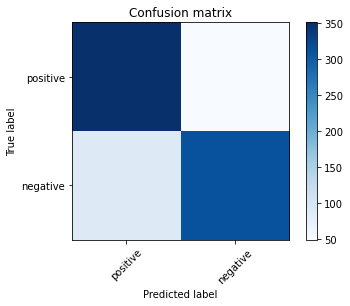

In [15]:
from sklearn.metrics import confusion_matrix

# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test_vector1)

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(confusion_matrix)
plt.imshow(confusion_matrix, cmap='Blues')

# add colorbar
plt.colorbar()

# add labels
labels=["positive","negative"]
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# add title and axis labels
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show plot
plt.show()

| Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: | :-: |
|False | False | False| False| False | 81.44%|
|False | True  | True | True | False | 82.63%|
|False | True  | True | True | True | 82.80%|
|True | False  | True | True | True | 82.08%|

## Second interation results analysis
Again you can see after altering the pre-processing techniques Lemmatization with tokenization seems to be working well with TF-IDF Naive Bayes. When only keeping strings that contains only alphabets the TF-IDF system really likes it. There isn't much of an increase in 0.4% from the best pre-processing obtained from the base implementaion. The confusion matrix is similar when we did our base implementation where there are more negative reviews still tagged as positives.

## Final interation: TF-IDF with Linear SVC

A linear support vector classifier (SVC) is a support vector machine that is trained to perform classification tasks using a linear kernel. It is linear model that can be used to separate data points into two classes by finding a line that best divides the data into the desired classes.
Linear SVCs have several advantages over other classification methods. They are fast and efficient to train, even on large datasets, and they can handle high-dimensional data well. Linear SVC's are also relatively insensitive to overfitting, which means that they can generalize well to new data points.

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Split the data into training and testing sets
labels = ["positive"] * 2000 + ["negative"] * 2000
vectorizer = TfidfVectorizer()
processed=[]
for items in all_data:
#     textF=get_features_stemma(items[0],False,False,False)
    textF=get_features_lemma(items[0],True,False,False)
    textF=" ".join(textF)
    processed.append(textF)
    
X_train, X_test, y_train, y_test = train_test_split(processed, labels, test_size=0.2, random_state=10)#23
# X_train2, X_test2, y_train2, y_test2 = train_test_split(all_data, labels, test_size=0.2, random_state=42)#42
# X_train3, X_test3, y_train3, y_test3 = train_test_split(all_data, labels, test_size=0.2, random_state=10)#10
# X_train4, X_test4, y_train4, y_test4 = train_test_split(all_data, labels, test_size=0.2, random_state=24)#24
# X_train5, X_test5, y_train5, y_test5 = train_test_split(all_data, labels, test_size=0.2, random_state=7)#7
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data with the fitted vectorizer
X_test = vectorizer.transform(X_test)
# Create and train the SVM model
model = LinearSVC()
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy*100)
# Create the TF-IDF vectorizer

84.0


In [17]:
import numpy as np
# Get the names of the features
feature_names = np.asarray(vectorizer.get_feature_names())

# Get the names of the labels
label_names = model.classes_
print(label_names)
# Print the features and their corresponding labels
top_features = np.argsort(model.coef_[0])[-10:]
print(f'Top 10 features for {label_names[1]}:')
for feature_index in top_features:
    print(f'\t{feature_names[feature_index]}')
    
top_features = np.argsort(model.coef_[0])[:10]
print(f'Top 10 features for {label_names[0]}:')
for feature_index in top_features:
    print(f'\t{feature_names[feature_index]}')
    

['negative' 'positive']
Top 10 features for positive:
	perfect
	best
	recommended
	world
	wonderful
	well
	favorite
	liked
	excellent
	great
Top 10 features for negative:
	bad
	worst
	waste
	awful
	poor
	no
	script
	terrible
	unfortunately
	dull


/Users/simonlim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.49      0.56      0.52       384
    positive       0.53      0.46      0.50       416

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



84.0
[[320  64]
 [ 64 352]]


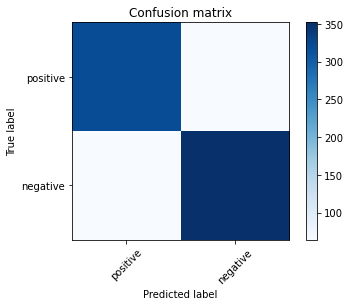

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
true_labels = y_test

# predicted labels for the test data
predicted_labels = predictions
cm = confusion_matrix(true_labels, predicted_labels)
print(accuracy*100)
print(cm)
plt.imshow(cm, cmap='Blues')

# add colorbar
plt.colorbar()

# add labels
labels=["positive","negative"]
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# add title and axis labels
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show plot
plt.show()

|Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: | :-: |
|False | False | False| False| False | 85.28%|
|False | True | False| False| False | 85.28%|
|False | True | False| False| True | 82.75%|
|False | True  | True | False | False | 84.66%|
|False | True  | True | True | False | 84.43%|
|False | True  | True | True | True | 84.68%|
|True | False  | True | True | True | 84.00%|

## Review of TF-IDF with a linear SVC

Linear SVC performs 2.48% better than TF-IDF with Naive Bayes. Interestingly the accuracy between Lemmatized and not Lemmatized without any other pre-processing technique scored the same. However, during my test I noticed a wider range of generalization with lemmatized text. This model also works best without any pre-processing. More specific pre-processing may lead to better performace for this model. Looking at the confusion matrix, the mistakes being made by this model is less skewed to false positives and is more equal. The top 10 features for positives/negatives shown are also very obvious to me that they have their respective sentiment (brilliant, great, bad, waste, etc...). No fractions are seen in the top 10 features anymore as well hence the importance of them may be insiginificant.

## Parsing and chunking with our final model
This section I decided to apply the parsing and chunking on my final model. This is due to the intuition that words like adjectives and adverbs are often important for expressing sentiment, as they are used to describe the qualities or emotions associated with a noun or verb. Hence, I decided to perform two task,1) only take Adverbs, nouns, adjectives and verbs and 2) take only adverbs and adjectives. Then pre-process those words and train our model. This can be done by Parts of Speech tagging.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Split the data into training and testing sets
labels = ["positive"] * 2000 + ["negative"] * 2000
vectorizer = TfidfVectorizer()
processed=[]
for items in all_data:
    postagged=posTAGGING(items[0])
#     textF=get_features_stemma(items[0],False,False,False)
    textF=get_features_lemma(postagged,True,False,False)
    textF=" ".join(textF)
    processed.append(textF)
    
X_train, X_test, y_train, y_test = train_test_split(processed, labels, test_size=0.2, random_state=7)#23
# X_train2, X_test2, y_train2, y_test2 = train_test_split(all_data, labels, test_size=0.2, random_state=42)#42
# X_train3, X_test3, y_train3, y_test3 = train_test_split(all_data, labels, test_size=0.2, random_state=10)#10
# X_train4, X_test4, y_train4, y_test4 = train_test_split(all_data, labels, test_size=0.2, random_state=24)#24
# X_train5, X_test5, y_train5, y_test5 = train_test_split(all_data, labels, test_size=0.2, random_state=7)#7
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data with the fitted vectorizer
X_test = vectorizer.transform(X_test)
# Create and train the SVM model
model = LinearSVC()
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy*100)
# Create the TF-IDF vectorizer

#### ADVERBS+NOUNS+VERBS+ADJECTIVES
|Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: |:-: |
|False | True | False| False| False | 79.69%|
#### ADVERBS+ADJECTIVES
|Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: |:-: |
|False | True | False| False| False | 78.63%|

In [ ]:
import numpy as np
# Get the names of the features
feature_names = np.asarray(vectorizer.get_feature_names())

# Get the names of the labels
label_names = model.classes_
print(label_names)
# Print the features and their corresponding labels
top_features = np.argsort(model.coef_[0])[-10:]
print(f'Top 10 features for {label_names[1]}:')
for feature_index in top_features:
    print(f'\t{feature_names[feature_index]}')
    
top_features = np.argsort(model.coef_[0])[:10]
print(f'Top 10 features for {label_names[0]}:')
for feature_index in top_features:
    print(f'\t{feature_names[feature_index]}')
    

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
true_labels = y_test

# predicted labels for the test data
predicted_labels = predictions
cm = confusion_matrix(true_labels, predicted_labels)
print(accuracy*100)
print(cm)
plt.imshow(cm, cmap='Blues')

# add colorbar
plt.colorbar()

# add labels
labels=["positive","negative"]
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# add title and axis labels
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# show plot
plt.show()

#### ADVERBS+NOUNS+VERBS+ADJECTIVES
|Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: |:-: |
|False | True | False| False| False | 79.69%|

#### ADVERBS+ADJECTIVES
|Stemmatise | Lemmatise |  Tokenization | Stopwords | AlphaNumericOnly| Average Testing Accuracy|
| :-: | :-: | :-: | :-: | :-: |:-: |
|False | True | False| False| False | 78.63%|

Looking at the accuracy it would appear that the model works worse with the POS filter. This proves that context matters within parts of speech and filtering out words that do not fall under adverbs, adjectives, nouns and verbs will lose some of its sentiment. The top 10 features of positives and negatives do display only adjectives+adverbs as per expected. Confusion matrix is has more wrong tagging for true positive sentiments but overall nothing out of the ordinary. From this data it proves that chunking and parsing requires very intriciate techniques to maintain the nuance of reviews to better analyse sentiment and using them just to filter certain parts of speech does not necessarily improve a model.

## Conclusion
From starting with the Base Naive Bayes and using word probablities I ended with TF-IDF on a linearSVC classifier with pre-processed text.

Pre-processing has a lot to play in terms of Sentiment Analysis, drastic changes can occur when done properly. Chunking and parsing was done through Parts of Speech tagging however the results were not the best as there were no improvements.

Given more time I would definitely try and look into recurrent neural networks as I have read that it can be used for sentiment analysis. Another area which I would like to look into optimizing the use of chunking and parsing using parts of speech as that is an area of interest of mine.

Groundbreaking development like BERT has come a long way interms of NLP and this project has defintely gave me a glimpse of its difficuly and how to approach an NLP task througouhly.